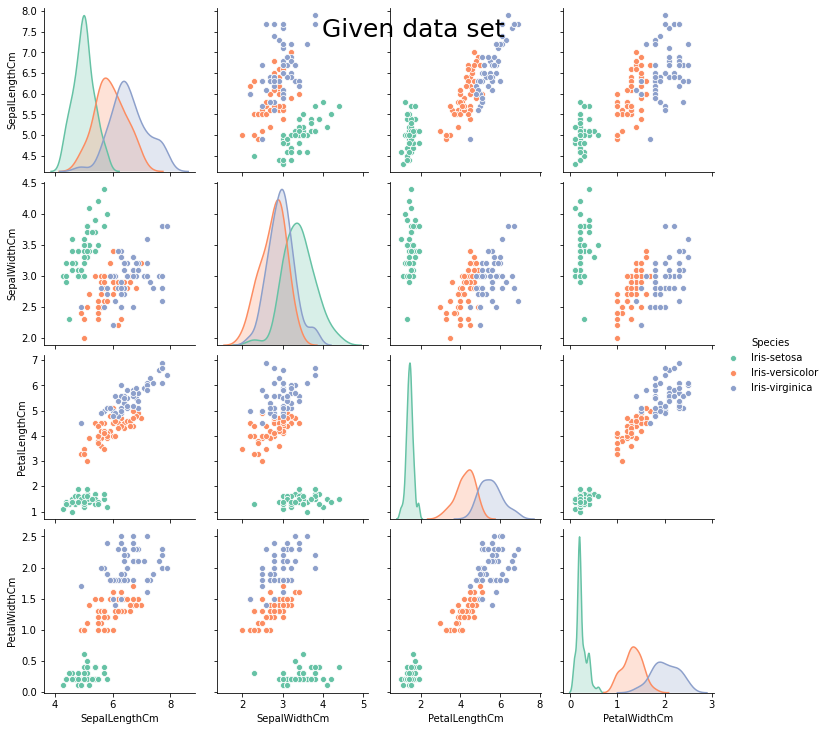

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.metrics.cluster import adjusted_rand_score

data=pd.read_csv('Iris.csv')
data.set_index(['Id'],inplace=True)

X=data.iloc[:,:-1]
y=data.iloc[:,-1].values
sns.pairplot(data=data,hue="Species",palette="Set2")
plt.suptitle('Given data set',size=25)
plt.show()

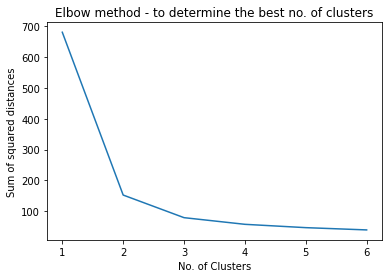

In [77]:
#using k-means
inertia=[]
for i in range(1,7):
  model=KMeans(n_clusters=i,init='k-means++').fit(X)
  inertia.append(model.inertia_)

plt.figure()
plt.plot(range(1,7),inertia)
plt.xlabel('No. of Clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method - to determine the best no. of clusters')
plt.show()

Score for Kmeans clustering for iris is  0.7302382722834697


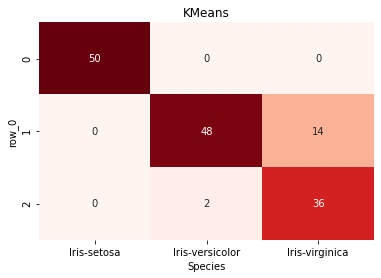

In [78]:
#using k-means
# the best number of clusters is 3.
model=KMeans(n_clusters=3,init='k-means++').fit(X)

ct=pd.crosstab(model.labels_,data['Species'])
plt.figure()
plt.title("KMeans")
sns.heatmap(ct,annot=True,cbar=False,cmap="Reds")
#there are around 16 wrong data points while using K-means clustering 
print('Score for Kmeans clustering for iris is ',adjusted_rand_score(model.labels_,data['Species']))

Score for Gaussian Mixture Model clustering for iris is  0.9038742317748124


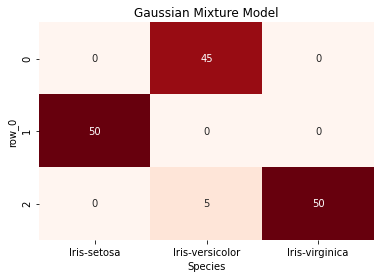

In [79]:
#using gaussian mixture model
model=GaussianMixture(n_components=3).fit(X)

ct1=pd.crosstab(model.predict(X),data['Species'])
plt.figure()
plt.title("Gaussian Mixture Model")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Reds")
#there are only 5 wrong data points while using Gaussian mixture model
print('Score for Gaussian Mixture Model clustering for iris is ',adjusted_rand_score(model.predict(X),data['Species']))

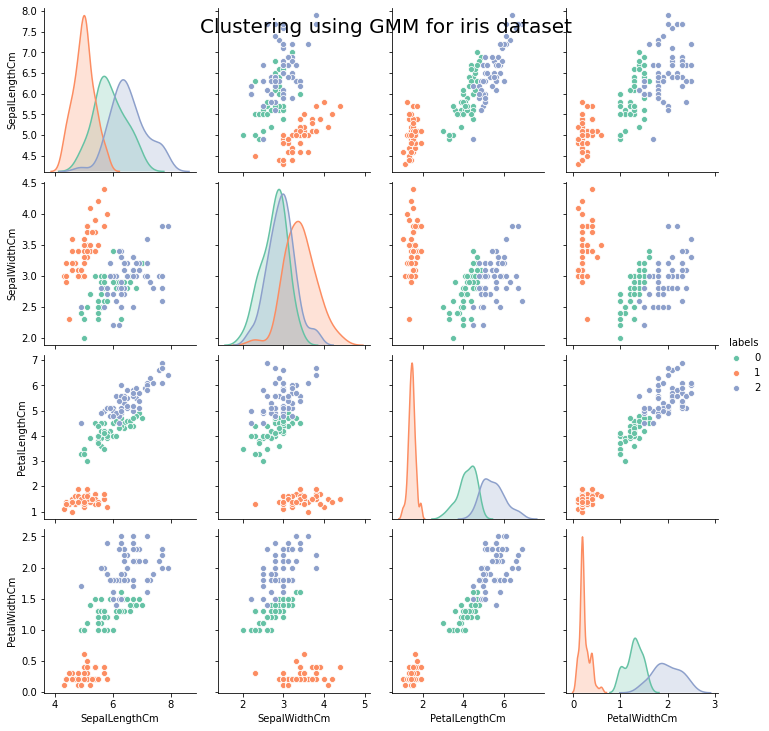

In [80]:
# the score of Gaussian Mixture model is higher than Kmeans Clustering
lab=model.predict(X)
X['labels']=lab
sns.pairplot(data=X,hue="labels",palette="Set2")
plt.suptitle('Clustering using GMM for iris dataset',size=20)
plt.show()